## Library yang akan digunakan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [11]:
df = pd.read_csv('Mcdonalds.csv')

## 1. BUSINESS UNDERSTANDING

A. Pengertian

Pada tahap ini membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data, dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun. Kegiatan yang dilakukan antara lain: menentukan tujuan dan persyaratan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut.

B. Problem 

McDonald di India memiliki berbagai macam menu dengan size yang berbeda-beda. Apakah ukuran makanan ini mempengaruhi asupan gizi yang diantaranya adalah energi, kolesterol, protein dan gula ini yang akan di serap oleh tubuh.
Maka daripada itu, McDonalds melakukan penelitian dan riset dengan pakar kesehatan untuk mencantumkan komposisi dari makanan yang mereka buat supaya pelanggan mengetahui asupan gizi yang akan masuk ke dalam tubuhnya.

C. Tujuan

Dataset yang di ambil dari kaggle ini (https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts) bertujuan untuk menganalisis dan mengetahui estimasi jumlah energi dari ukuran menu McDonalds, agar pelanggan dapat lebih memahami kandungan nutrisi dan dapat membuat keputusan untuk makanan yang akan pelanggan beli, serta membantu mengelola kesehatan dengan lebih baik.

## 2. DATA UNDERSTANDING

A. Pengertian 

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data. Tahap ini juga harus dilakukan secara cermat dan tidak terburu-buru, seperti pada visualisasi data, yang terkadang insight-nya sangat sulit didapat dika dihubungkan dengan summary data nya. Jika ada masalah pada tahap ini yang belum terjawab, maka akan menggangu pada tahap modeling.

Dari pengumpulan data yang telah diambil mengenai Menu nutrisi McDonalds India, terdapat 13 kolom yang berisi 3 kolom objek, 10 kolom float. Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah. Berikut atribut-atribut nya :

0. Menu Categeory (Golongan)                 = objek
1. Menu Items (Nama-nama menu)               = objek
2. Serve_Size                                = objek
3. Energy (Kalori)                         = float
4. Protein (Protein)                         = float
5. Total_fat (Total Lemak)                = float
6. Sat_fat (Lemak Jenuh)                    = float            
7. Trans_Fat (Lemak trans)                   = float
8. Cholesterol (Kolestrol)                    = float
9. Total_Carbohydrate (Total karbohidrat)      = float      
10. Dietary (Serat Makanan)             = float
11. Total_Sugars  (Gula)                  = float          
12. Sodium (Sodium)                        = float    

## Deskripsi dataset

In [12]:
df.head()

,Menu Category,Menu Items,Serve_Size,Energy,Protein,Total_fat,Sat_Fat,Trans_fat,Cholesterols,Total_carbohydrate,Total_Sugars,Added_Sugars,Sodium
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


# DATA PREPARATION

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Menu Category       141 non-null    object 
 1   Menu Items          141 non-null    object 
 2   Serve_Size          141 non-null    object 
 3   Energy              141 non-null    float64
 4   Protein             141 non-null    float64
 5   Total_fat           141 non-null    float64
 6   Sat_Fat             141 non-null    float64
 7   Trans_fat           141 non-null    float64
 8   Cholesterols        141 non-null    float64
 9   Total_carbohydrate  141 non-null    float64
 10  Total_Sugars        141 non-null    float64
 11  Added_Sugars        141 non-null    float64
 12  Sodium              140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


## Mencari heatmap

<AxesSubplot:>

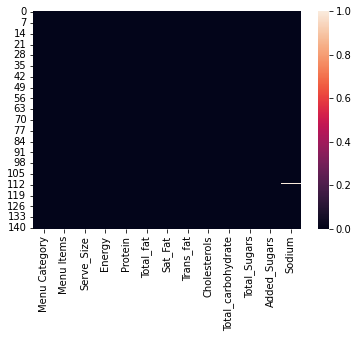

In [14]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [15]:
df.describe()

,Energy,Protein,Total_fat,Sat_Fat,Trans_fat,Cholesterols,Total_carbohydrate,Total_Sugars,Added_Sugars,Sodium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


## Visualisasi Data

<AxesSubplot:>

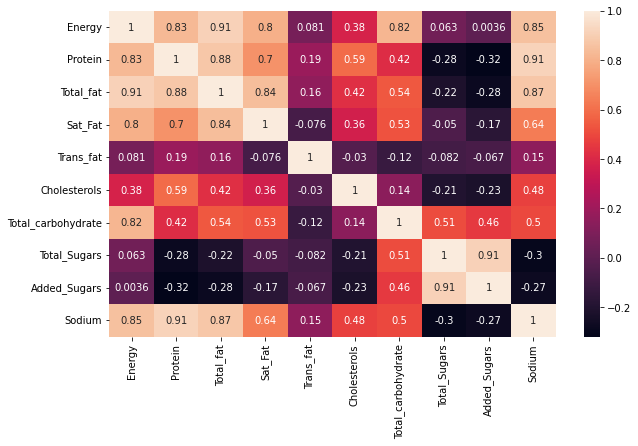

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## Jumlah Energy Berdasarkan Size Menu

In [18]:
brands = df.groupby('Serve_Size').count()[['Protein']].sort_values(by='Protein', ascending=True).reset_index()
brands = brands.rename(columns={'Protein':'Energy'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106]),
 [Text(0, 0, '10 g'),
  Text(1, 0, '306 g'),
  Text(2, 0, '301 g'),
  Text(3, 0, '30 g'),
  Text(4, 0, '297.5 ml'),
  Text(5, 0, '296.5 ml'),
  Text(6, 0, '296 g'),
  Text(7, 0, '291.5 ml'),
  Text(8, 0, '290 ml'),
  Text(9, 0, '307 g'),
  Text(10, 0, '280 ml'),
  Text(11, 0, '264.5 g'),
  Text(12, 0, '26.5 ml'),
  Text(13, 0, '257 g'),
  Text(14, 0, '93.29 g'),
  Text(15, 0, '245 ml'),
 

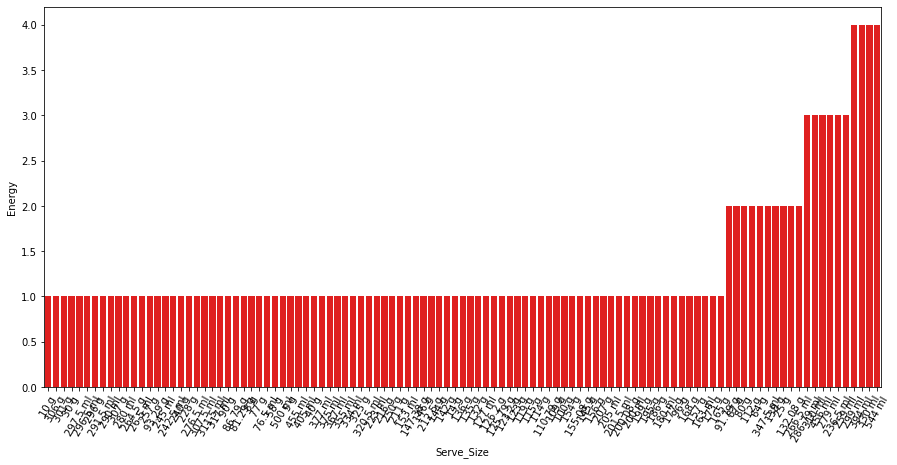

In [19]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['Serve_Size'], y = brands['Energy'], color = 'red')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [21]:
fitur = ['Cholesterols', 'Total_carbohydrate', 'Total_Sugars', 'Protein']
x = df[fitur]
y = df['Energy']
x.shape, y.shape

((141, 4), (141,))

## Split Data Training & Testing

In [22]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(36,)

## membuat regresi linier

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [24]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9640439754565693


## Membuat inputan regresi linier

In [26]:
#Cholesterols (mg) = 25.24 , Total_Carbohydrate (g) = 56.96 , Total_Sugars (g) = 7.85 , Protein (g) = 15.3
inputan = np.array([[25.24, 56.96, 7.85, 15.3]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Energi dalam setiap size menu  : ', prediksi)

Estimasi Jumlah Kalori Menu Burger King :  [506.28582489]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

## Save Model

In [27]:
import pickle
filename = 'estimasi_mcdonalds.sav'
pickle.dump(lr,open(filename,'wb'))